## <center>**Atharv Biradar**
---
# <center>AI Project
## <center>**Stock Price Analysis**

---
##### <center>**Predict Stock Closing Price of Diff. Companies and comparing it with real values**

##### <center>**Predict Stock Closing Price of all companies for the next 1 month**

**Only for educational purposes, dont use for business/trading purposes**

Dataset Links -

[STOCK - MAIN DATASET](https://docs.google.com/spreadsheets/d/1DNAK9u7XHCn1952Oyo-YVidbOObXKdwixcdU5rhvzQg/edit?usp=sharing)

[STOCK - SECONDARY DATA ](https://drive.google.com/file/d/1n7OkF9wpdAqeXL8Ao3c-8AQ4Pl4GBTn6/view?usp=sharing) - used for prediction

# 1.IMPORTING LIBRARIES

In [ ]:
#importing dataset
from google.colab import files
uploaded = files.upload()

Saving stockData.csv to stockData.csv


In [ ]:
#importing required libraries

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras import optimizers

# 2.LOAD DATA

In [ ]:
#reading dataset
df = pd.read_csv('stockData.csv',index_col='Date', parse_dates=['Date'])

# 3.EXPLORING DATA

In [ ]:
df.head(7)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM
2006-01-10,79.00,79.01,78.08,78.53,1919900,MMM
2006-01-11,78.44,78.66,77.84,78.37,1911900,MMM


In [ ]:
#shape of dataframe
print("Shape of the data is : ",df.shape)

Shape of the data is :  (93612, 6)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93612 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    93587 non-null  float64
 1   High    93602 non-null  float64
 2   Low     93592 non-null  float64
 3   Close   93612 non-null  float64
 4   Volume  93612 non-null  int64  
 5   Name    93612 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.0+ MB


In [ ]:
#getting unique values i.e. name of the companies
df['Name'].unique()

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

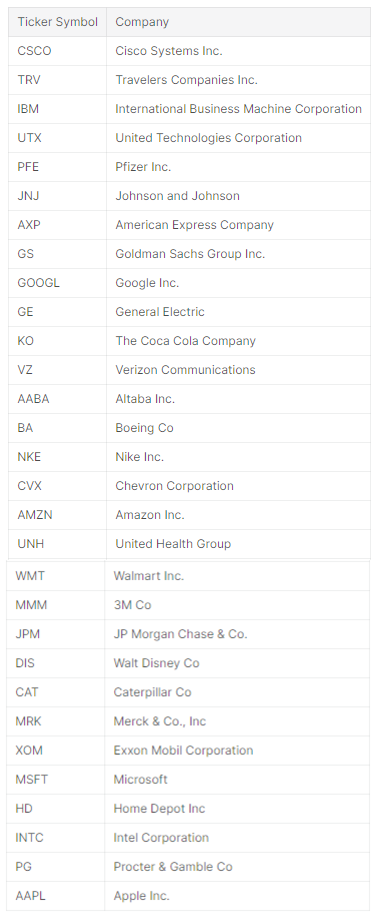

In [ ]:
name_count = df.groupby(['Name']).count()
print(name_count['Close'].unique())

[3019 3020]


# 4.PREPARING DATASET

In [ ]:
stock = list(df['Name'].unique())
df_ = {}
for i in stock:
    df_[i] = df.loc[df['Name']==i]

In [ ]:
def splitDataset(data, date, col):
    return data.loc[:date,col], data.loc[date:,col]

In [ ]:
df_new_ = {}
for i in stock:
    df_new_[i] = {}
    df_new_[i]['Train'], df_new_[i]['Test'] = splitDataset(df_[i], '2016', 'Close')

# 5.VISUALIZING DATA

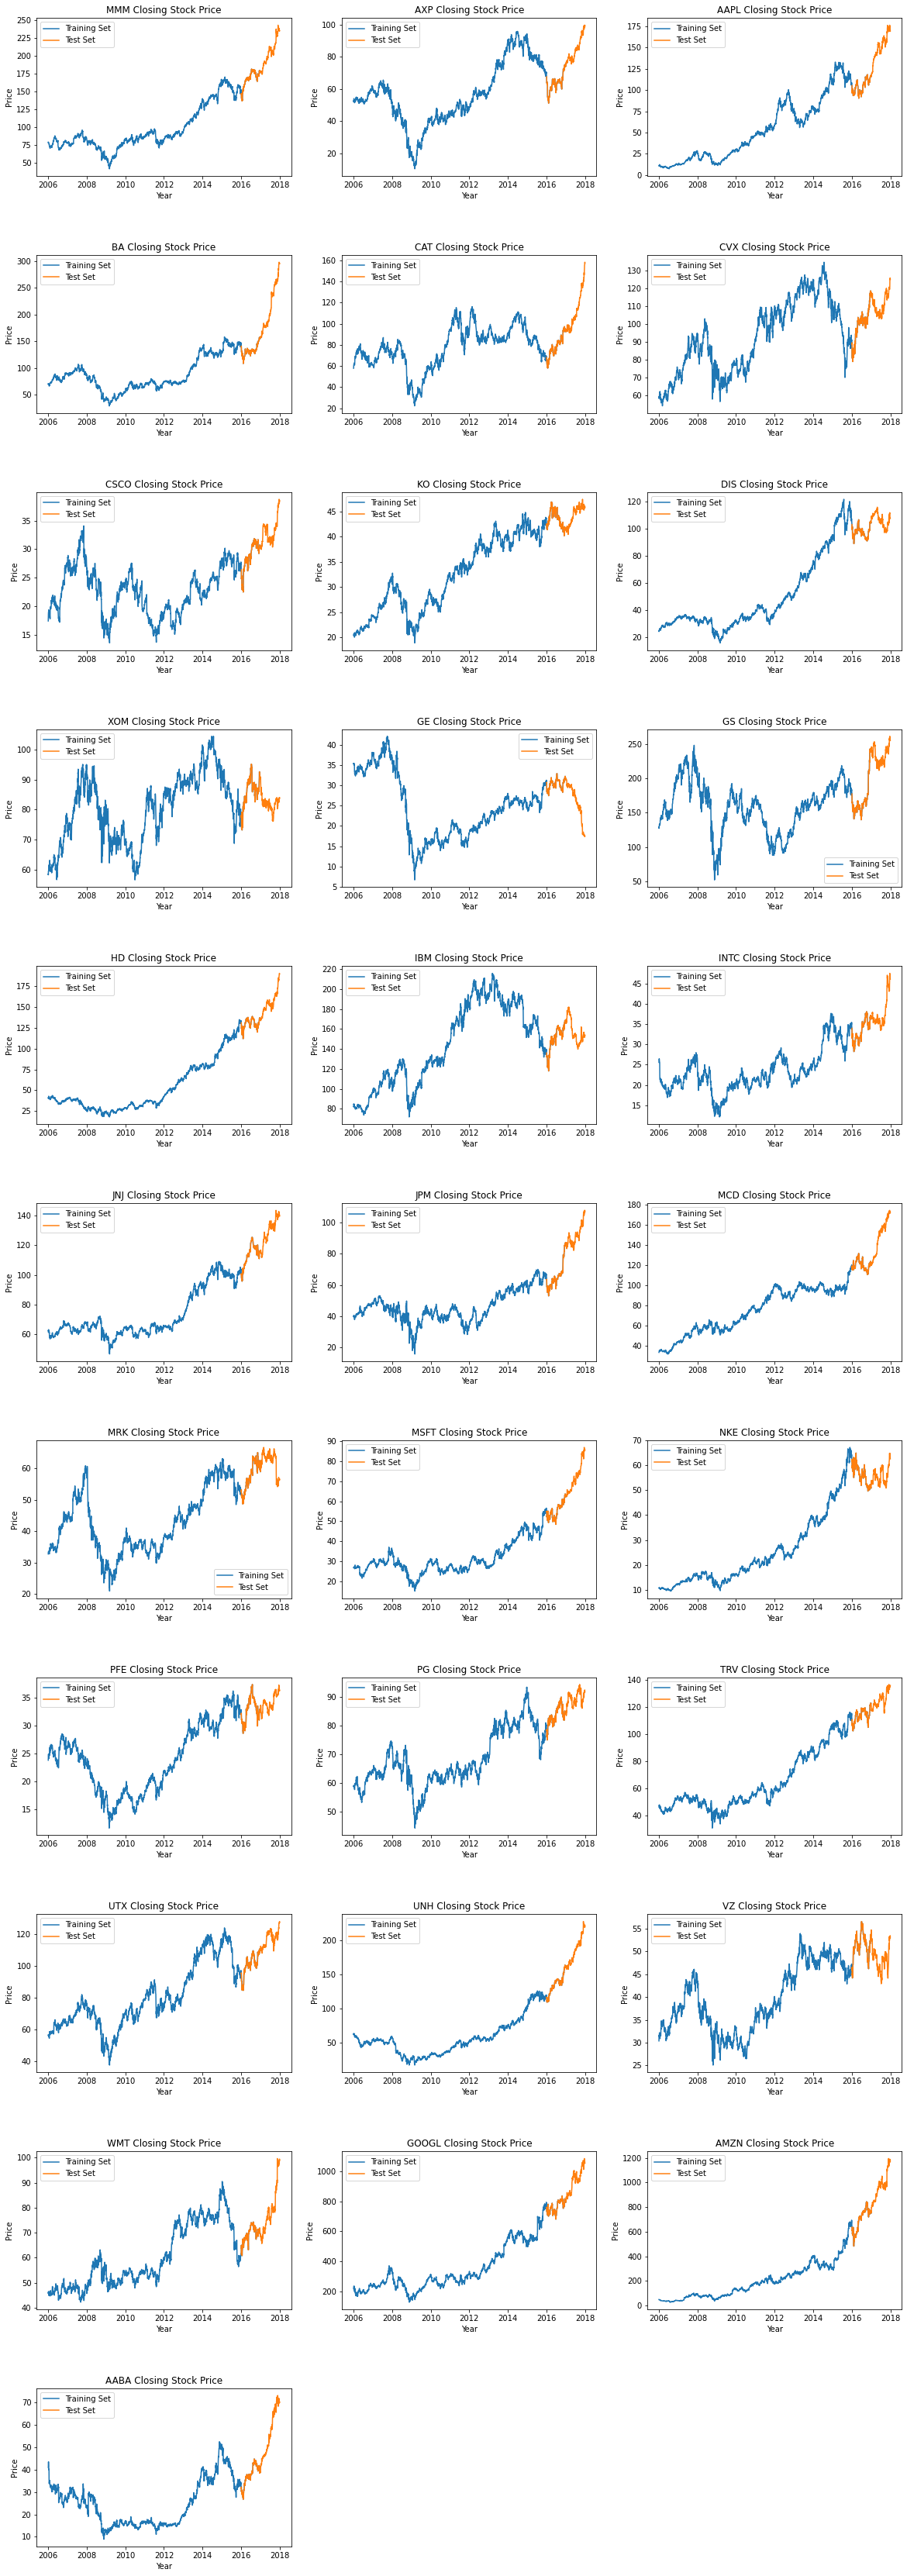

In [ ]:
plt.figure(figsize=(20,60))
n=0
for i in stock:
    n += 1
    plt.subplot(11,3,n)
    plt.subplots_adjust(hspace = 0.5 ,wspace = 0.2)
    plt.plot(df_new_[i]['Train'])
    plt.plot(df_new_[i]['Test'])
    plt.ylabel("Price")
    plt.xlabel("Year")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Closing Stock Price")
plt.show()

# 6.PROCESSING DATA

In [ ]:
for i in stock:
    df_new_[i]['Train'] = pd.DataFrame(df_new_[i]['Train']).dropna()
    df_new_[i]['Test'] = pd.DataFrame(df_new_[i]['Test']).dropna()

In [ ]:
sc= {}
for i in stock:
    df_new_[i]['Train'] = df_new_[i]['Train'].values.reshape(-1,1)
    df_new_[i]['Test'] = df_new_[i]['Test'].values.reshape(-1,1)
    scaler =  MinMaxScaler()
    df_new_[i]['Train'] = scaler.fit_transform(df_new_[i]['Train'])
    df_new_[i]['Test'] = scaler.transform(df_new_[i]['Test'])
    sc[i] = scaler

In [ ]:
train_count = 10000000000
test_count = 100000000
for i in stock:
    print(i, df_new_[i]['Train'].shape, df_new_[i]['Test'].shape)
    train_count = min(train_count, df_new_[i]['Train'].shape[0])
    test_count = min(test_count, df_new_[i]['Test'].shape[0])

MMM (2769, 1) (503, 1)
AXP (2769, 1) (503, 1)
AAPL (2768, 1) (503, 1)
BA (2769, 1) (503, 1)
CAT (2769, 1) (503, 1)
CVX (2769, 1) (503, 1)
CSCO (2768, 1) (503, 1)
KO (2769, 1) (503, 1)
DIS (2769, 1) (503, 1)
XOM (2769, 1) (503, 1)
GE (2769, 1) (503, 1)
GS (2769, 1) (503, 1)
HD (2769, 1) (503, 1)
IBM (2769, 1) (503, 1)
INTC (2768, 1) (503, 1)
JNJ (2769, 1) (503, 1)
JPM (2769, 1) (503, 1)
MCD (2769, 1) (503, 1)
MRK (2768, 1) (503, 1)
MSFT (2768, 1) (503, 1)
NKE (2769, 1) (503, 1)
PFE (2769, 1) (503, 1)
PG (2769, 1) (503, 1)
TRV (2769, 1) (503, 1)
UTX (2769, 1) (503, 1)
UNH (2769, 1) (503, 1)
VZ (2769, 1) (503, 1)
WMT (2769, 1) (503, 1)
GOOGL (2768, 1) (503, 1)
AMZN (2768, 1) (503, 1)
AABA (2768, 1) (503, 1)


In [ ]:
time_steps = 100

train = {}
for i in stock:
    train[i] = {}
    X_train = []
    y_train = []
    for j in range(time_steps, train_count):
        X_train.append(df_new_[i]['Train'][j-time_steps:j,0])
        y_train.append(df_new_[i]['Train'][j,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    train[i]['X_train'] = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    train[i]['y_train'] = y_train
    print(i, train[i]['X_train'].shape, train[i]['y_train'].shape)

MMM (2668, 100, 1) (2668,)
AXP (2668, 100, 1) (2668,)
AAPL (2668, 100, 1) (2668,)
BA (2668, 100, 1) (2668,)
CAT (2668, 100, 1) (2668,)
CVX (2668, 100, 1) (2668,)
CSCO (2668, 100, 1) (2668,)
KO (2668, 100, 1) (2668,)
DIS (2668, 100, 1) (2668,)
XOM (2668, 100, 1) (2668,)
GE (2668, 100, 1) (2668,)
GS (2668, 100, 1) (2668,)
HD (2668, 100, 1) (2668,)
IBM (2668, 100, 1) (2668,)
INTC (2668, 100, 1) (2668,)
JNJ (2668, 100, 1) (2668,)
JPM (2668, 100, 1) (2668,)
MCD (2668, 100, 1) (2668,)
MRK (2668, 100, 1) (2668,)
MSFT (2668, 100, 1) (2668,)
NKE (2668, 100, 1) (2668,)
PFE (2668, 100, 1) (2668,)
PG (2668, 100, 1) (2668,)
TRV (2668, 100, 1) (2668,)
UTX (2668, 100, 1) (2668,)
UNH (2668, 100, 1) (2668,)
VZ (2668, 100, 1) (2668,)
WMT (2668, 100, 1) (2668,)
GOOGL (2668, 100, 1) (2668,)
AMZN (2668, 100, 1) (2668,)
AABA (2668, 100, 1) (2668,)


In [ ]:
test = {}
for i in stock:
    test[i] = {}
    X_test = []
    y_test = []
    for j in range(time_steps, test_count):
        X_test.append(df_new_[i]['Test'][j-time_steps:j,0])
        y_test.append(df_new_[i]['Test'][j,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    test[i]['X_test'] = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    test[i]['y_test'] = y_test
    print(i, test[i]['X_test'].shape, test[i]['y_test'].shape)

MMM (403, 100, 1) (403,)
AXP (403, 100, 1) (403,)
AAPL (403, 100, 1) (403,)
BA (403, 100, 1) (403,)
CAT (403, 100, 1) (403,)
CVX (403, 100, 1) (403,)
CSCO (403, 100, 1) (403,)
KO (403, 100, 1) (403,)
DIS (403, 100, 1) (403,)
XOM (403, 100, 1) (403,)
GE (403, 100, 1) (403,)
GS (403, 100, 1) (403,)
HD (403, 100, 1) (403,)
IBM (403, 100, 1) (403,)
INTC (403, 100, 1) (403,)
JNJ (403, 100, 1) (403,)
JPM (403, 100, 1) (403,)
MCD (403, 100, 1) (403,)
MRK (403, 100, 1) (403,)
MSFT (403, 100, 1) (403,)
NKE (403, 100, 1) (403,)
PFE (403, 100, 1) (403,)
PG (403, 100, 1) (403,)
TRV (403, 100, 1) (403,)
UTX (403, 100, 1) (403,)
UNH (403, 100, 1) (403,)
VZ (403, 100, 1) (403,)
WMT (403, 100, 1) (403,)
GOOGL (403, 100, 1) (403,)
AMZN (403, 100, 1) (403,)
AABA (403, 100, 1) (403,)


# 7.LSTM MODEL

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.4))

model.add(Dense(units=1))

optimizer = optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

for i in stock:
    print("Fitting to", i)
    model.fit(train[i]['X_train'], train[i]['y_train'], epochs=10, batch_size=150)

Fitting to MMM
Epoch 1/10
18/18 [==============================] - 10s 298ms/step - loss: 0.1112
Epoch 2/10
18/18 [==============================] - 5s 298ms/step - loss: 0.0119
Epoch 3/10
18/18 [==============================] - 5s 291ms/step - loss: 0.0069
Epoch 4/10
18/18 [==============================] - 6s 313ms/step - loss: 0.0060
Epoch 5/10
18/18 [==============================] - 5s 304ms/step - loss: 0.0058
Epoch 6/10
18/18 [==============================] - 5s 289ms/step - loss: 0.0055
Epoch 7/10
18/18 [==============================] - 5s 288ms/step - loss: 0.0058
Epoch 8/10
18/18 [==============================] - 5s 303ms/step - loss: 0.0055
Epoch 9/10
18/18 [==============================] - 5s 299ms/step - loss: 0.0051
Epoch 10/10
18/18 [==============================] - 5s 290ms/step - loss: 0.0049
Fitting to AXP
Epoch 1/10
18/18 [==============================] - 5s 299ms/step - loss: 0.0063
Epoch 2/10
18/18 [==============================] - 5s 300ms/step - loss: 0.0

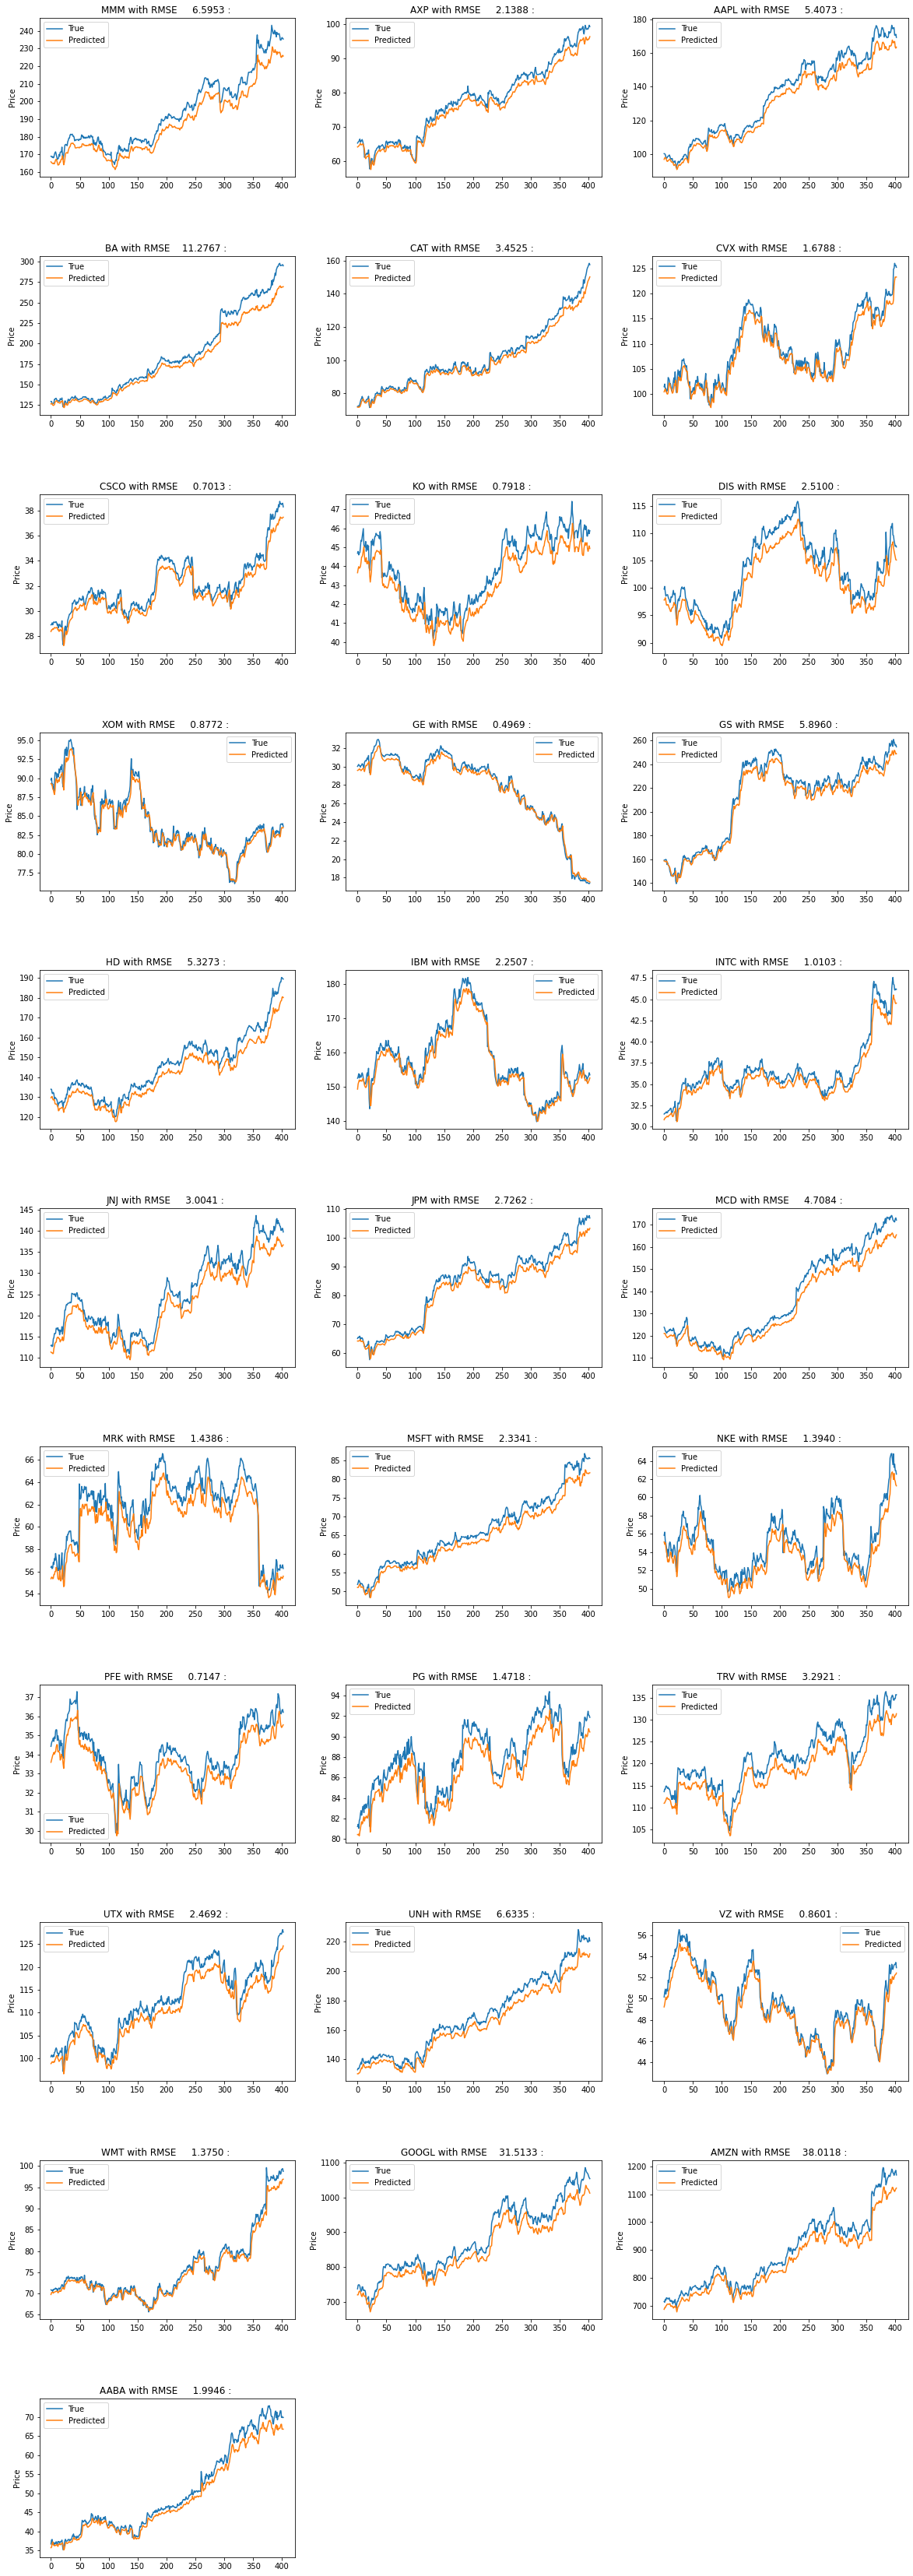

In [ ]:
pred_result = {}
n=0
plt.figure(figsize=(20,60))
for i in stock:
    y_true = sc[i].inverse_transform(test[i]['y_test'].reshape(-1,1))
    predicted_stock_price = model.predict(test[i]['X_test'])
    y_pred = sc[i].inverse_transform(predicted_stock_price)
    RMSE = math.sqrt(mean_squared_error(y_true, y_pred))
    pred_result[i] = {}
    pred_result[i]["True"] = y_true
    pred_result[i]["Pred"] = y_pred
    
    n = n+1
    plt.subplot(11,3,n)
    plt.subplots_adjust(hspace = 0.5 ,wspace = 0.2)
    plt.title("{} with RMSE {:10.4f} : ".format(i,RMSE))
    plt.ylabel("Price")
    plt.plot(y_true)
    plt.plot(y_pred)
    plt.legend(['True', 'Predicted'])
plt.show()

# 8.PREDICTING STOCK CLOSING PRICE FOR ALL COMPANY

In [ ]:
from numpy import array

In [ ]:
def get_pred_data(k):
  testing_input = df_new_[k]['Test']
  x_input=testing_input[(len(testing_input)-100):].reshape(1,-1)
  temp_input=list(x_input)
  temp_input=temp_input[0].tolist()
  lst_output=[]
  n_steps=100
  i=0
  while(i<30): 
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
  
  return lst_output

In [ ]:
mmm_out = get_pred_data('MMM')
axp_out = get_pred_data('AXP')
aapl_out = get_pred_data('AAPL')
ba_out = get_pred_data('BA')
cat_out = get_pred_data('CAT')
cvx_out= get_pred_data('CVX')
csco_out = get_pred_data('CSCO')
ko_out = get_pred_data('KO') 
dis_out = get_pred_data('DIS')
xom_out = get_pred_data('XOM')
ge_out = get_pred_data('GE')
gs_out = get_pred_data('GS')
hd_out = get_pred_data('HD')
ibm_out = get_pred_data('IBM')
intc_out = get_pred_data('INTC')
jnj_out = get_pred_data('JNJ') 
jpm_out = get_pred_data('JPM')
mcd_out = get_pred_data('MCD')
mrk_out = get_pred_data('MRK')
msft_out = get_pred_data('MSFT')
nke_out = get_pred_data('NKE')
pfe_out = get_pred_data('PFE')
pg_out = get_pred_data('PG')
trv_out = get_pred_data('TRV') 
utx_out = get_pred_data('UTX')
unh_out = get_pred_data('UNH')
vz_out = get_pred_data('VZ')
wmt_out = get_pred_data('WMT')
googl_out = get_pred_data('GOOGL')
amzn_out = get_pred_data('AMZN')
aaba_out = get_pred_data('AABA')

Streaming output truncated to the last 5000 lines.
 0.95438596 0.94736842 0.94892788 0.95087719 0.95438596 0.96452242
 0.96218324 0.9625731  0.96218324 0.94814815 0.95672515 0.94230019
 0.9582846  0.96530214 0.96452242 0.95945419 0.95516569 0.93879142
 0.93333333 0.91578947 0.9122807  0.92007797 0.92787524 0.93138402
 0.92241715 0.92397661 0.92319688 0.91773879 0.91695906 0.92163743
 0.92475634 0.92397661 0.93177388 0.92436647 0.92358674 0.93099415
 0.92670565 0.92904483 0.92904483 0.94307992 0.95711501 0.95906433
 0.9625731  0.95126706 0.93450292 0.93177388 0.9294347  0.93879142
 0.95711501 0.97153996 0.97387914 0.9668616  0.9957115  0.99298246
 0.98557505 0.9668616  0.9582846  0.95438596 0.95711501 0.96179337
 0.96335283 0.95750487 0.92788857 0.9071908  0.88742977 0.87081683
 0.85600019 0.84197235 0.82857597 0.81599152 0.80435562 0.7936697
 0.78384542 0.77476406 0.76630938 0.75837696]
14 day output [[0.750875]]
15 day input [0.84951267 0.86783626 0.86939571 0.86315789 0.8705653  0.87

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stockData100.csv to stockData100.csv


In [ ]:
df1 = pd.read_csv("stockData100.csv")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3100 non-null   float64
 1   Name    3100 non-null   object 
dtypes: float64(1), object(1)
memory usage: 48.6+ KB


In [ ]:
stock100 = list(df1['Name'].unique())
df_100 = {}
for i in stock100:
    df_100[i] = df1.loc[df1['Name']==i]

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
for i in stock100:
  df_100[i] = df_100[i].reset_index()['Close']
  df_100[i]=scaler.fit_transform(np.array(df_100[i]).reshape(-1,1))

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
def pred_plot(data_100,lst_out,name_c):
  plt.figure(figsize=(25,5))
  plt.subplots_adjust(hspace = 0.5 ,wspace = 0.2)
  plt.subplot(1,2,1)
  plt.plot(day_new,scaler.inverse_transform(data_100))
  plt.plot(day_pred,scaler.inverse_transform(lst_out))
  plt.title(name_c)
  plt.ylabel("Price")
  plt.xlabel("Days - 0 - 130")
  plt.legend(['Previos 100 days', 'Predicted 30 days'])
  df3=data_100.tolist()
  df3.extend(lst_out)
  df3=scaler.inverse_transform(df3).tolist()
  plt.subplot(1,2,2)
  plt.plot(df3)
  plt.title(name_c)
  plt.ylabel("Price")
  plt.legend(['Combined graph'])
  plt.xlabel("Days - 0 - 130")

# 9.RESULT

### **The result graphs are quite smooth as they have been scaled but they show matchable realistic data.**

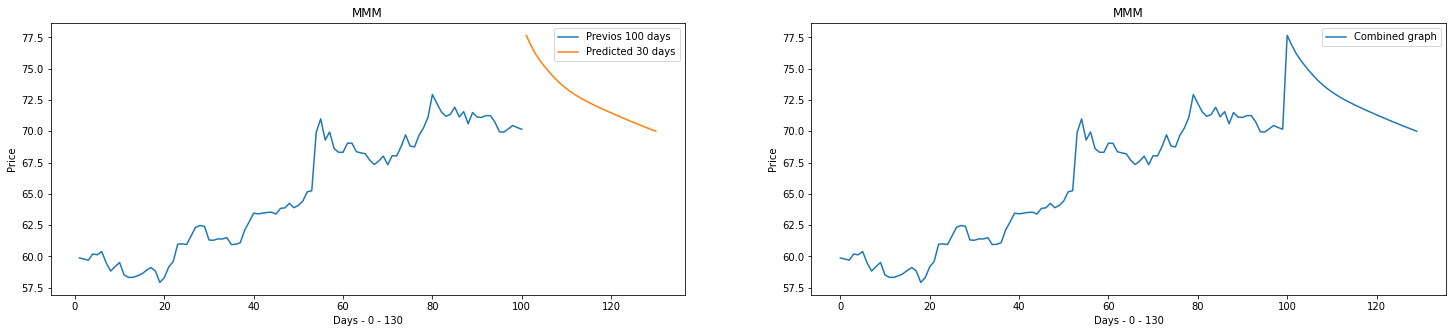

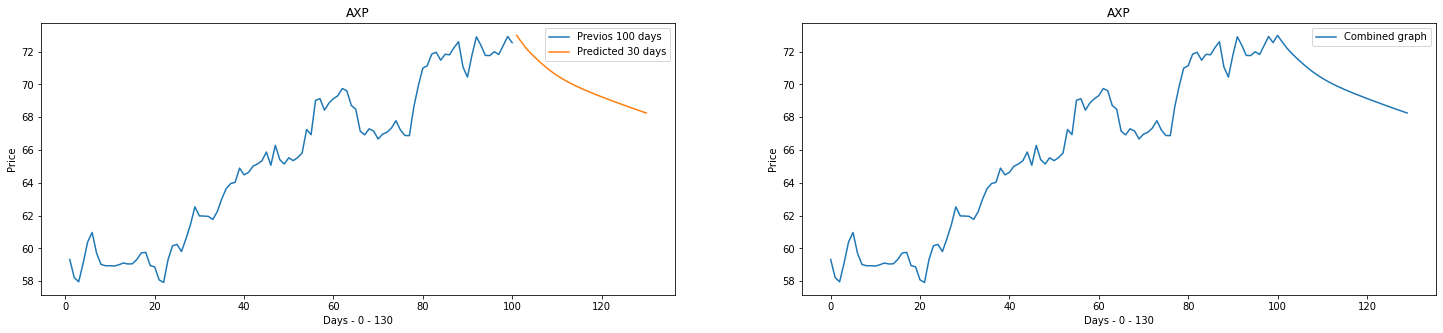

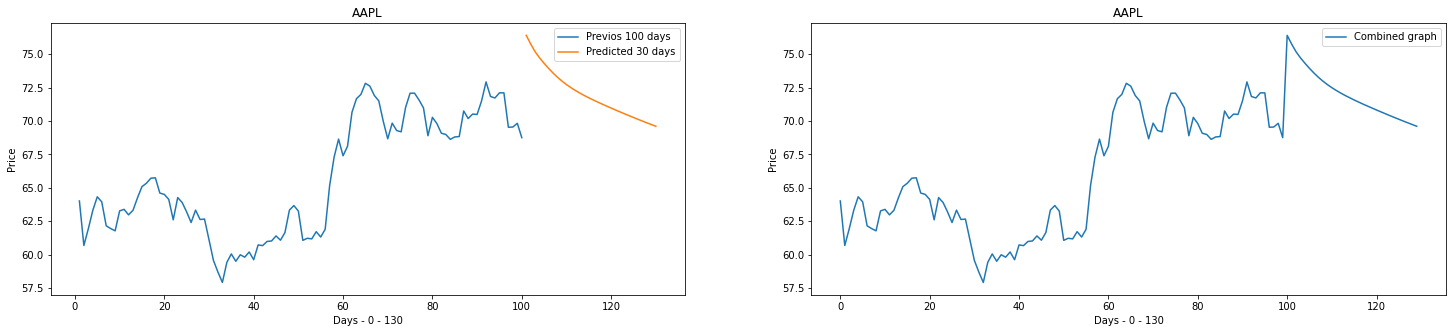

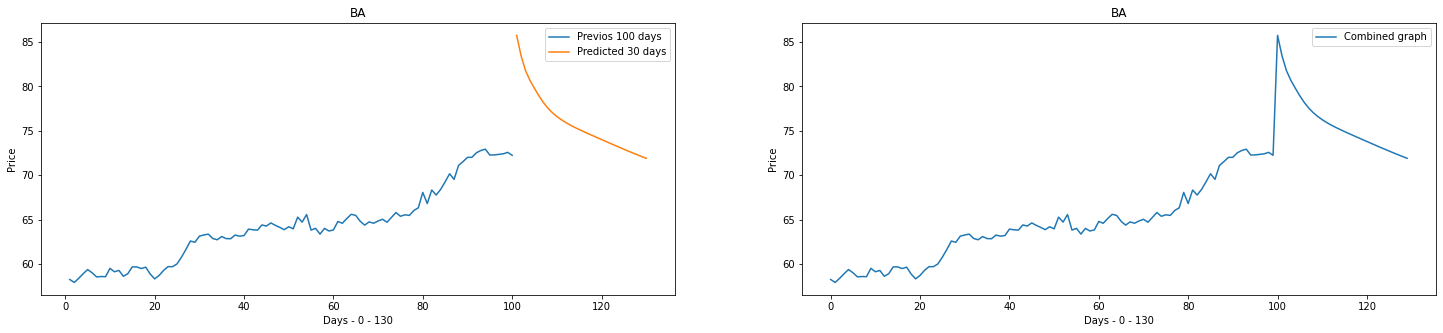

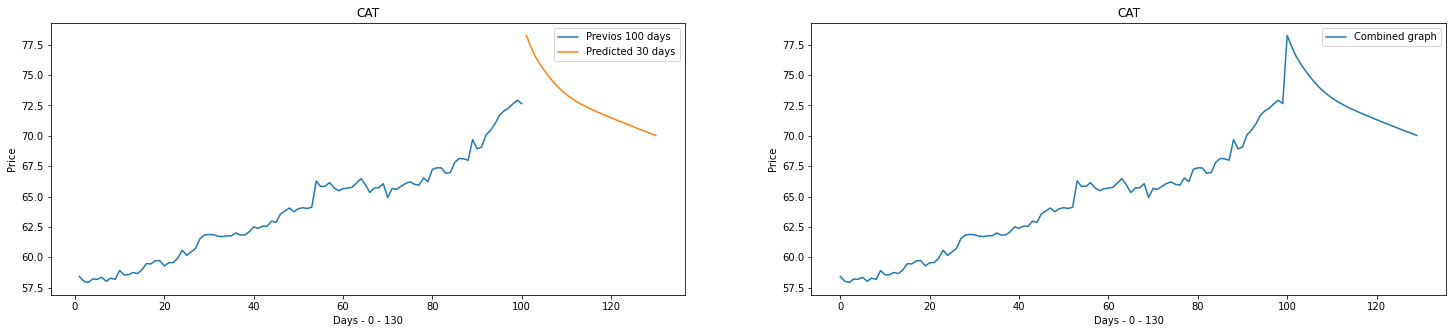

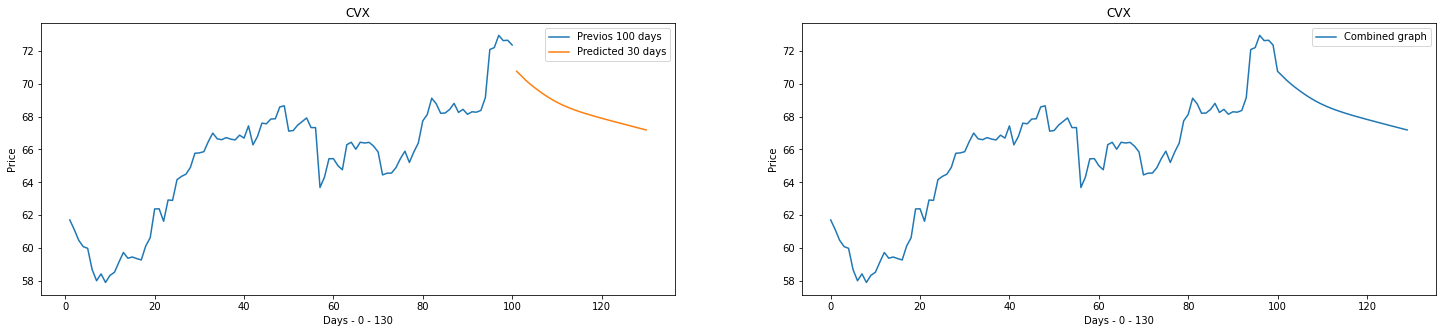

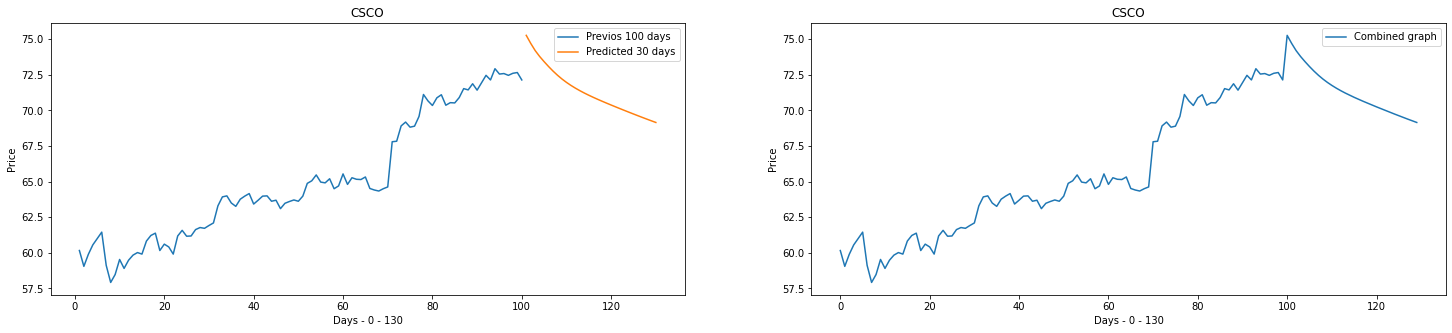

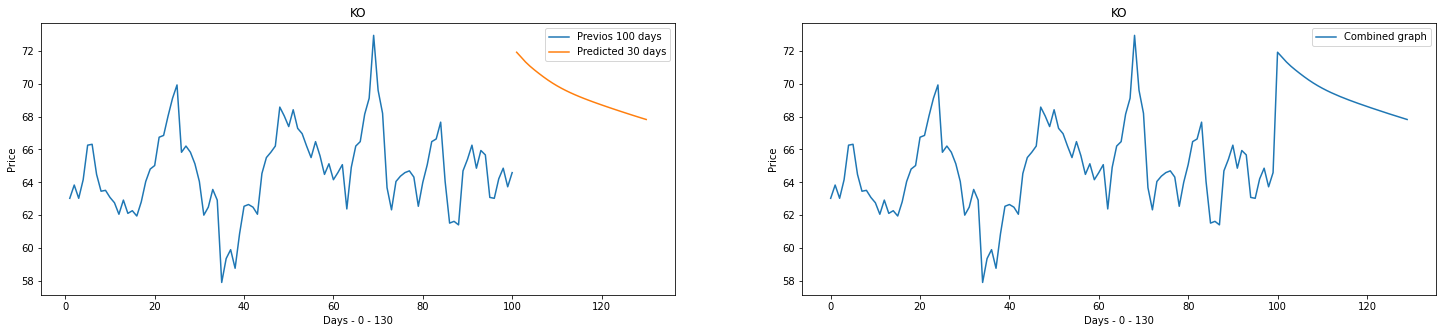

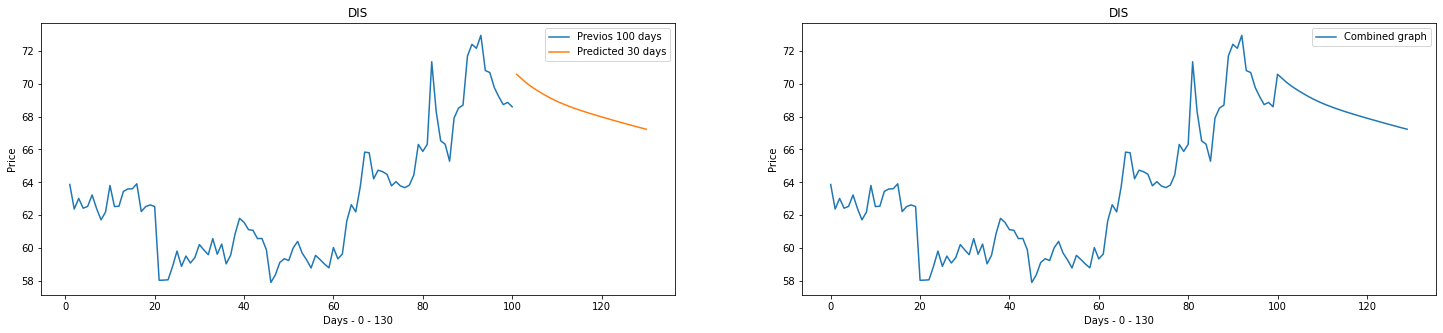

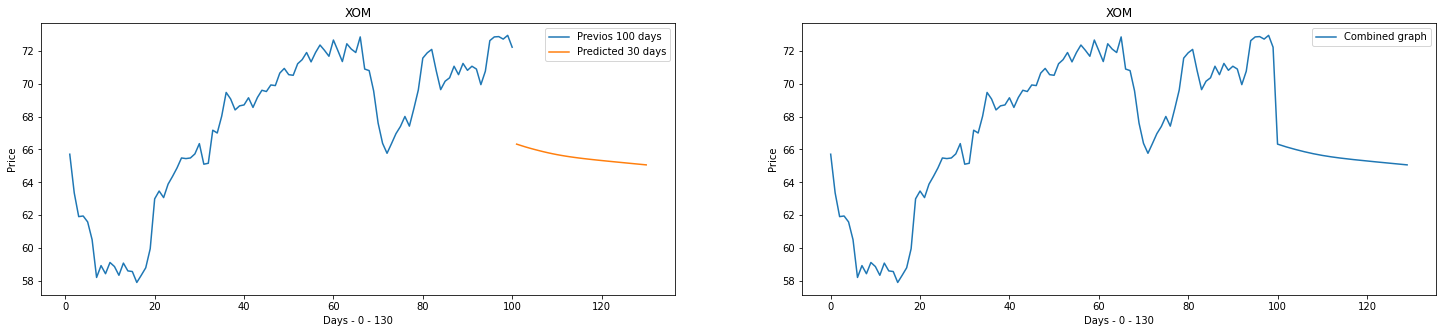

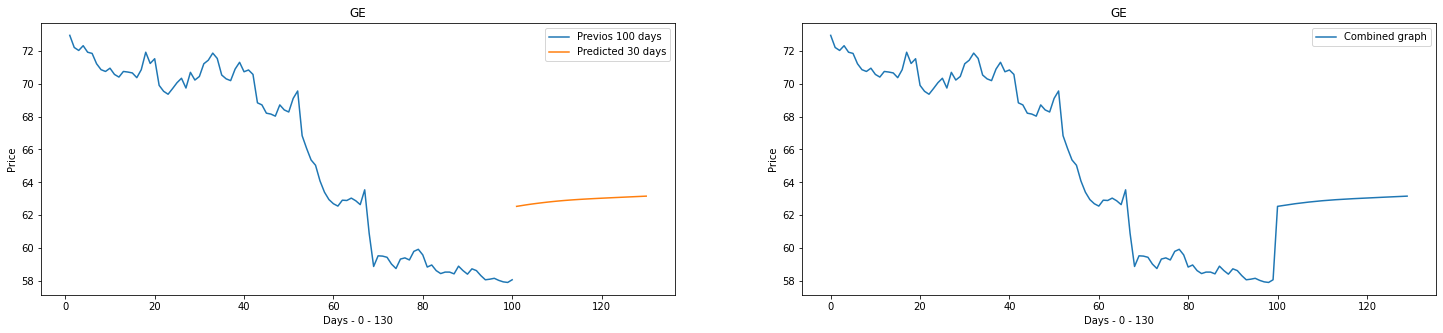

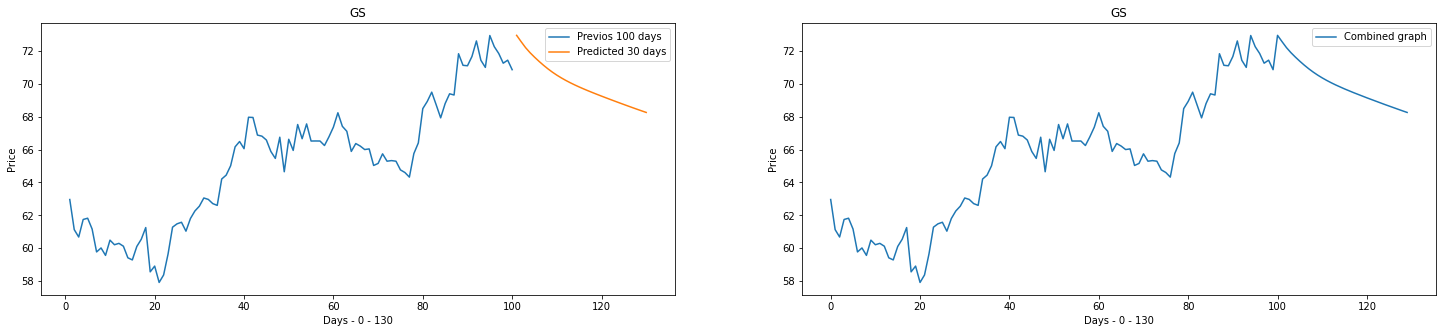

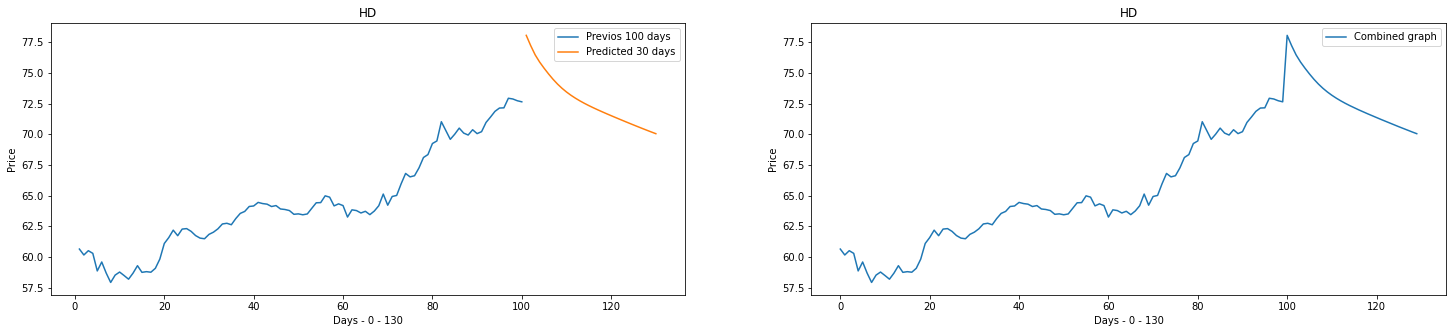

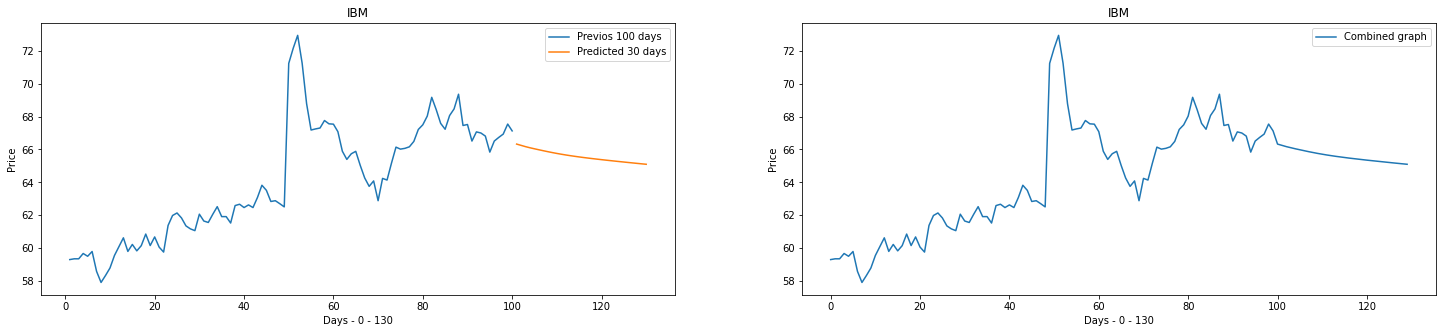

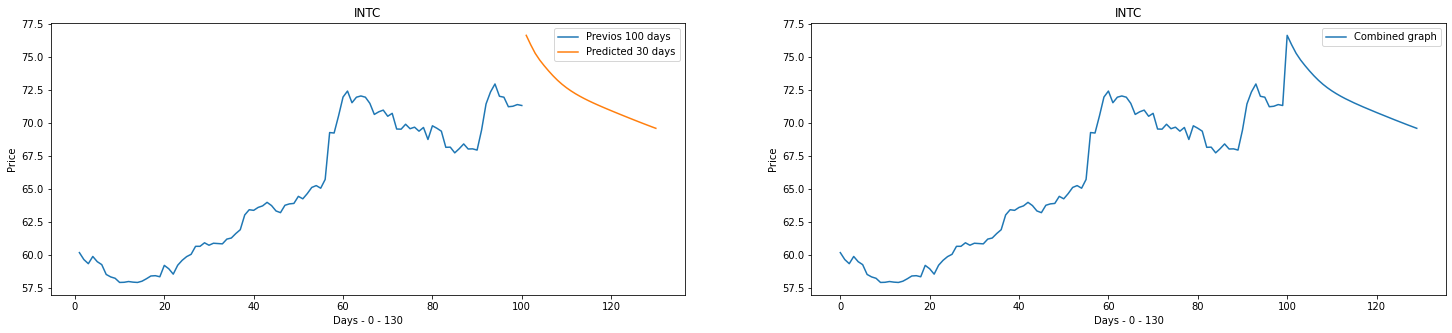

In [ ]:
pred_plot(df_100['MMM'],mmm_out,"MMM")
pred_plot(df_100['AXP'],axp_out,"AXP")
pred_plot(df_100['AAPL'],aapl_out,"AAPL")
pred_plot(df_100['BA'],ba_out,"BA")
pred_plot(df_100['CAT'],cat_out,"CAT")
pred_plot(df_100['CVX'],cvx_out,"CVX")
pred_plot(df_100['CSCO'],csco_out,"CSCO")
pred_plot(df_100['KO'],ko_out,"KO")
pred_plot(df_100['DIS'],dis_out,"DIS")
pred_plot(df_100['XOM'],xom_out,"XOM")
pred_plot(df_100['GE'],ge_out,"GE")
pred_plot(df_100['GS'],gs_out,"GS")
pred_plot(df_100['HD'],hd_out,"HD")
pred_plot(df_100['IBM'],ibm_out,"IBM")
pred_plot(df_100['INTC'],intc_out,"INTC")

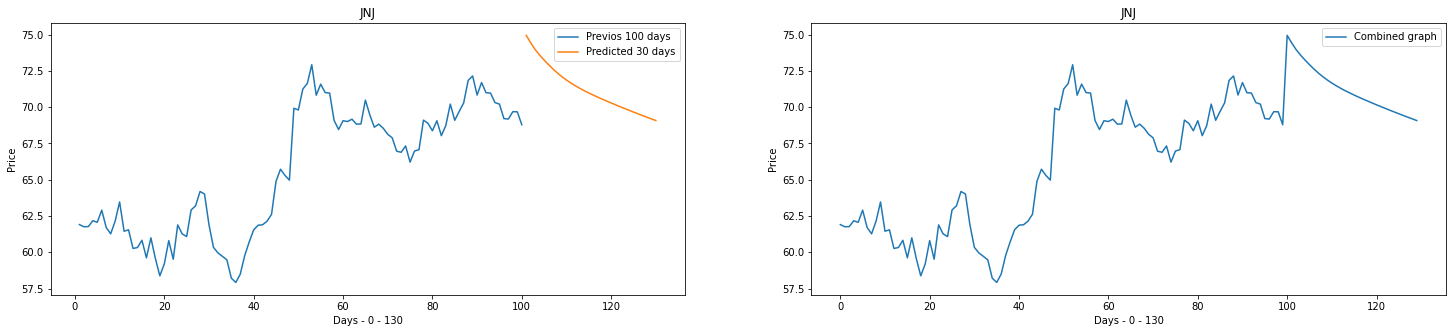

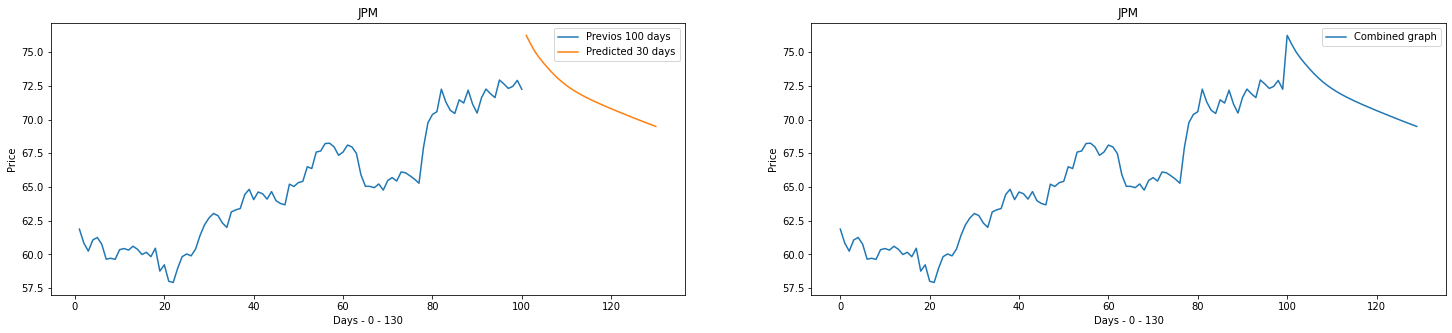

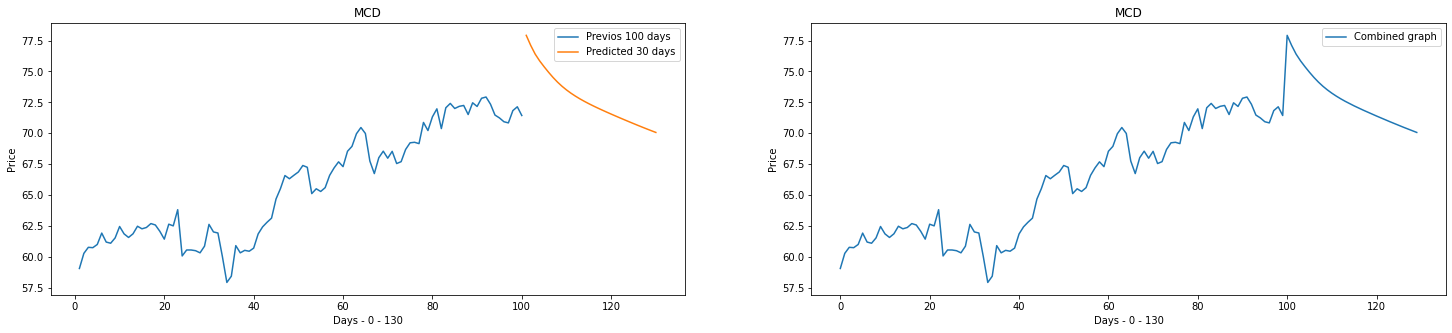

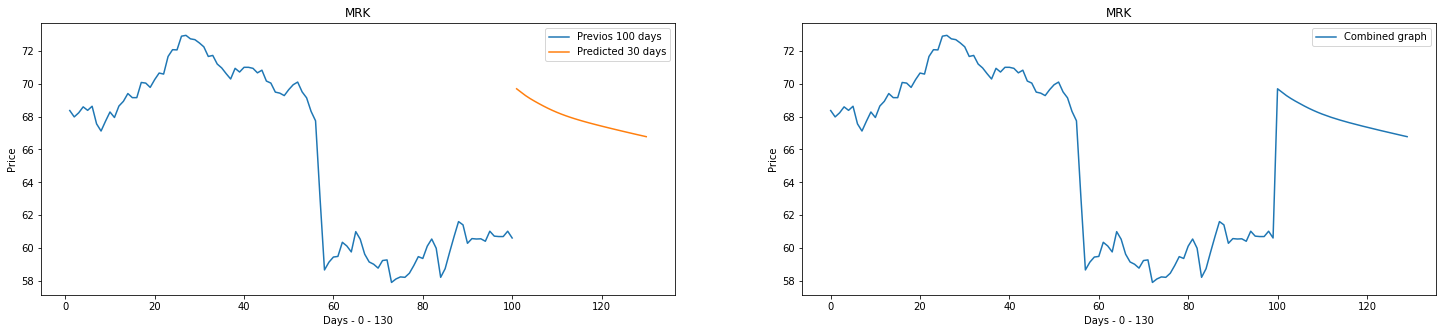

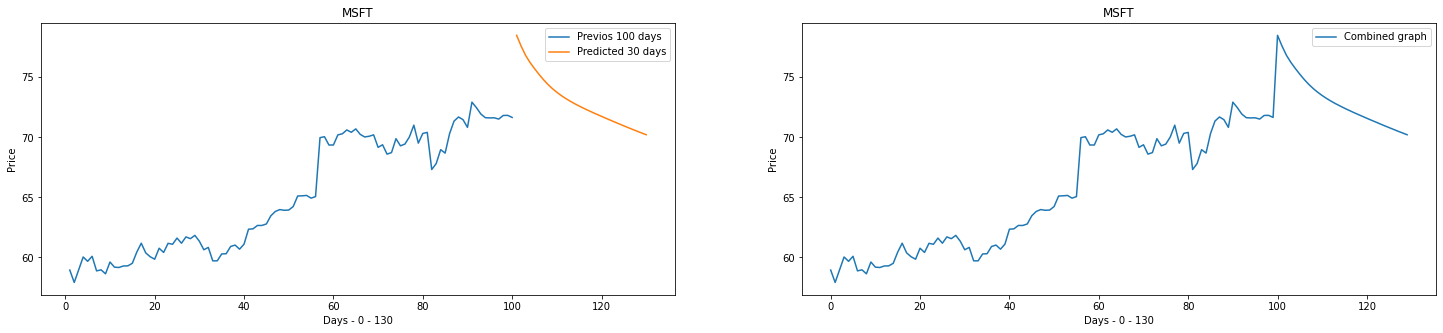

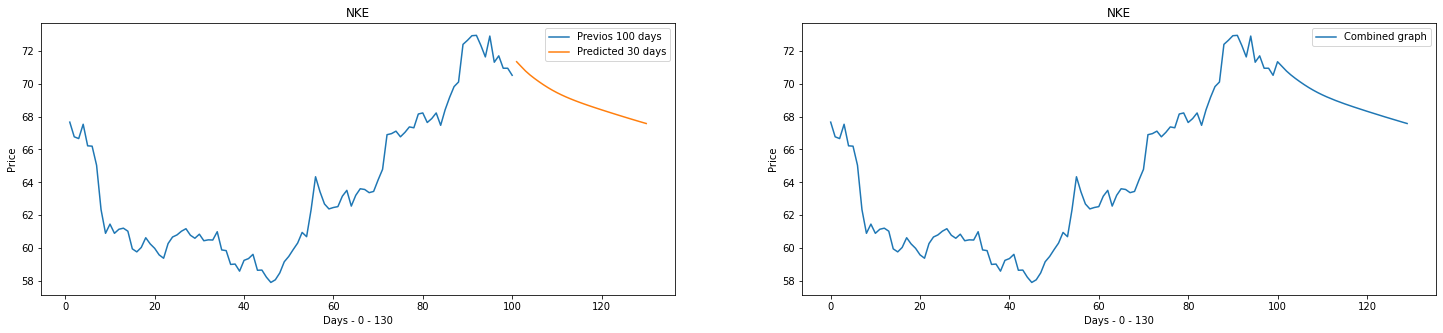

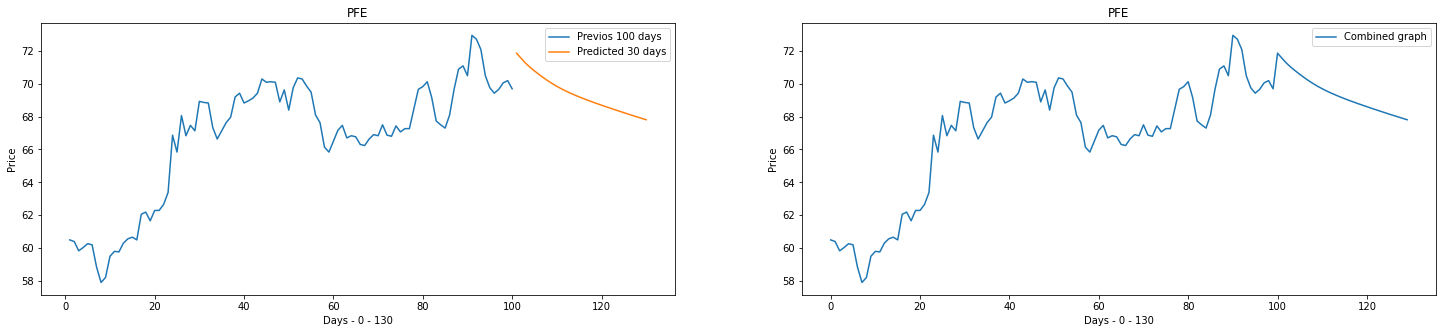

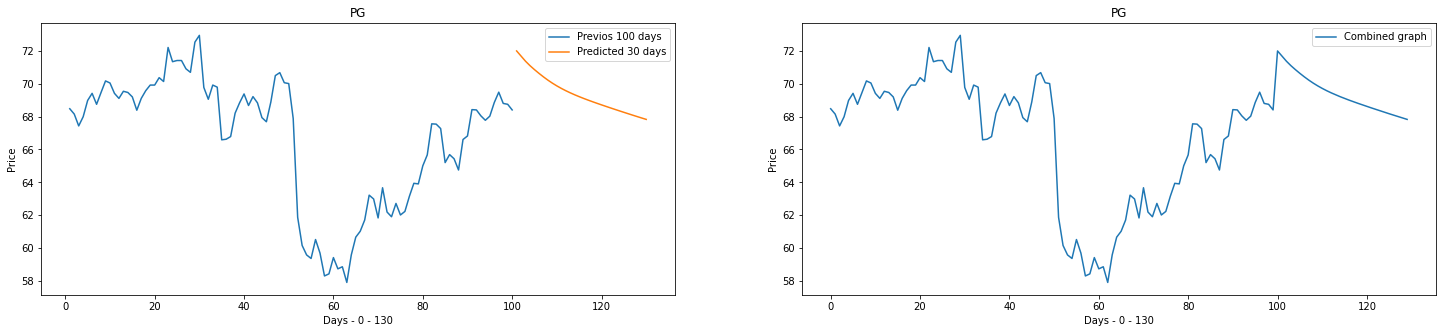

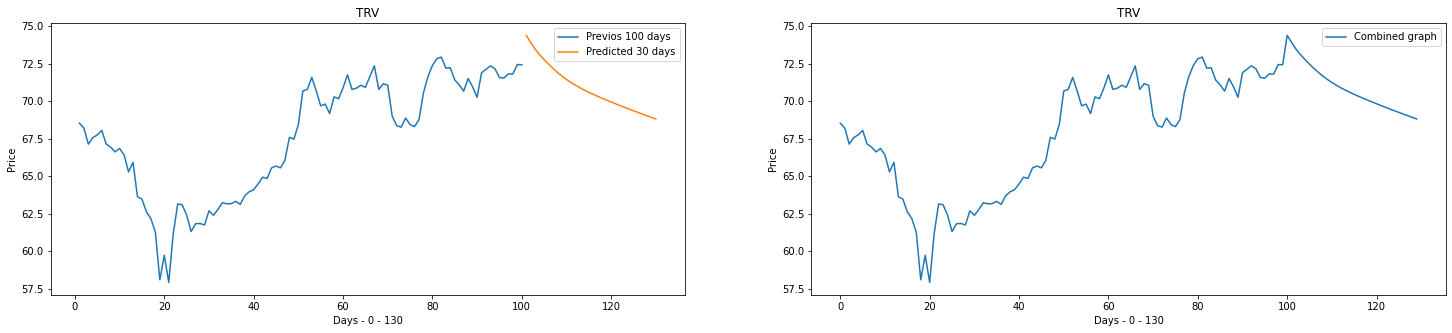

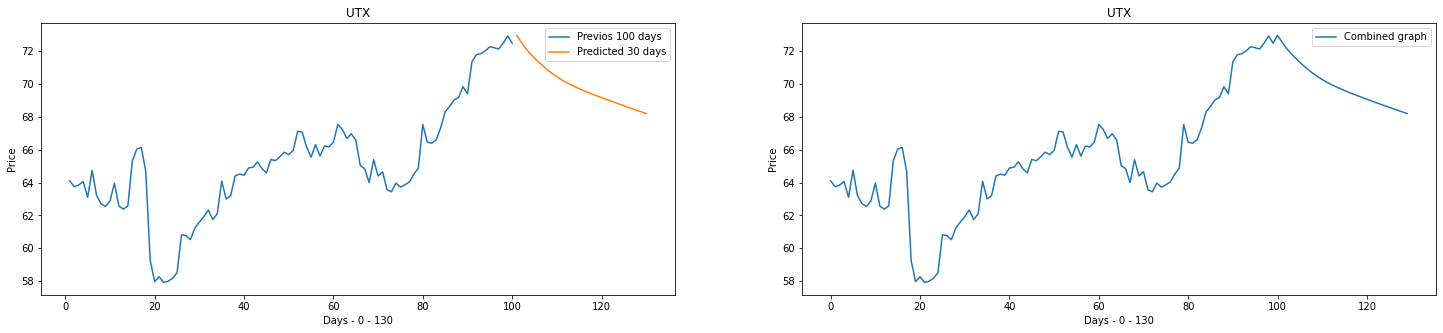

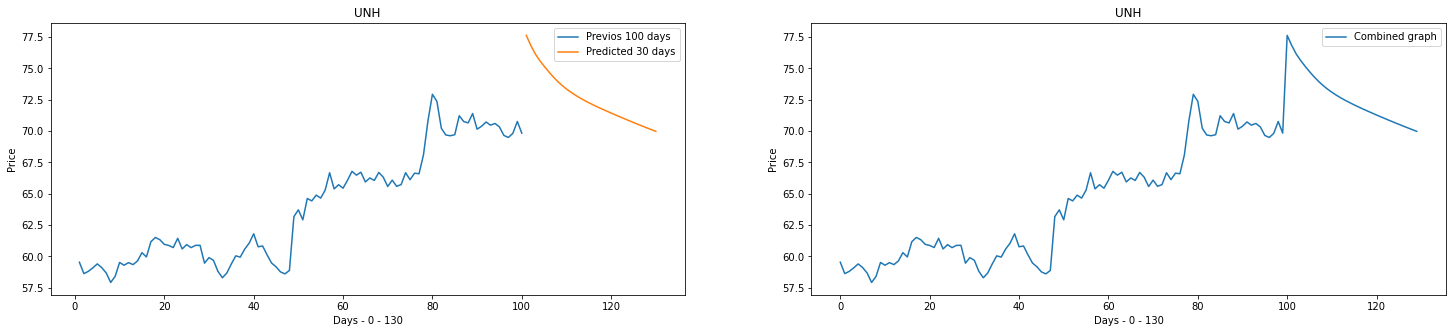

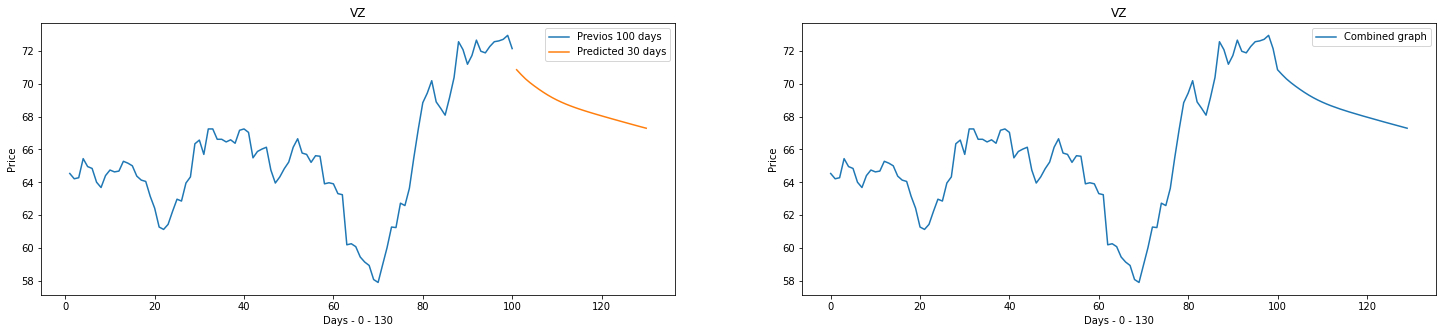

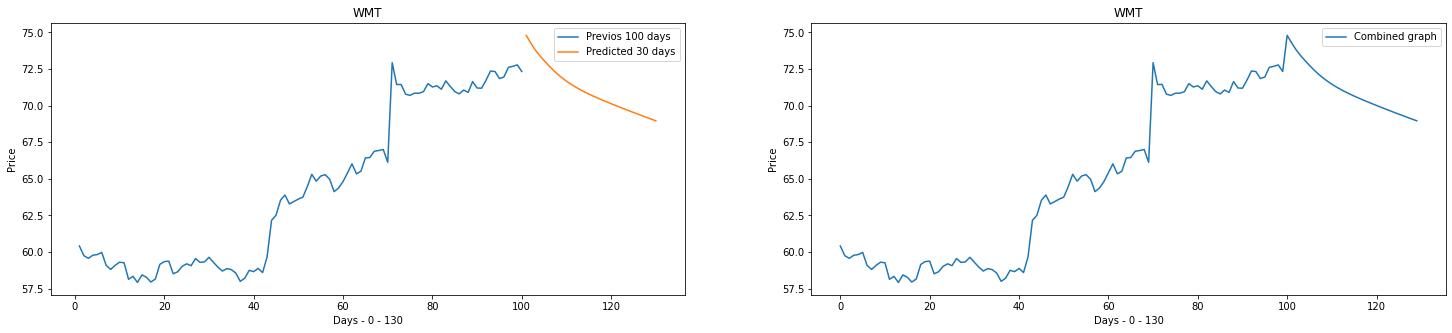

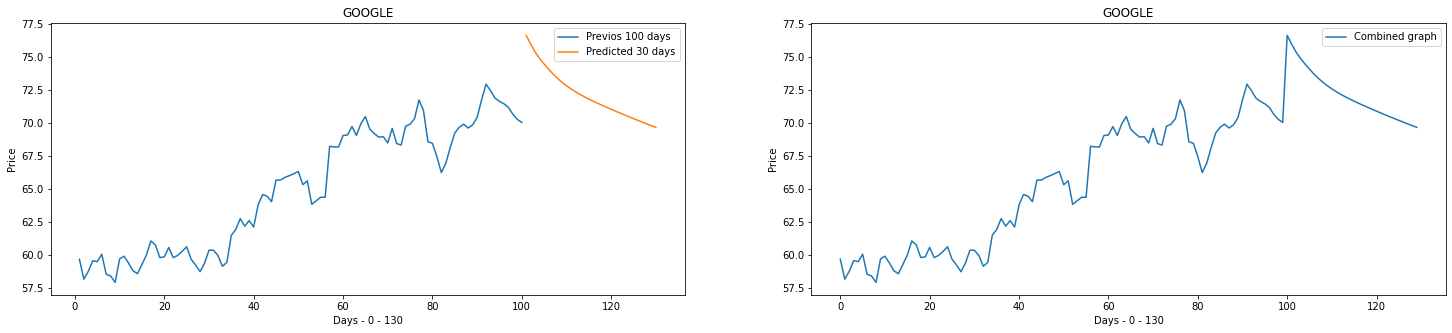

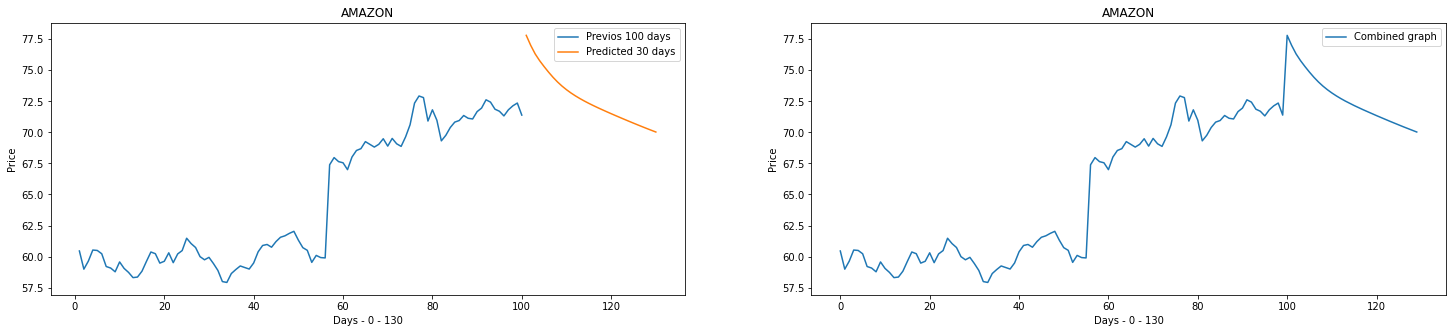

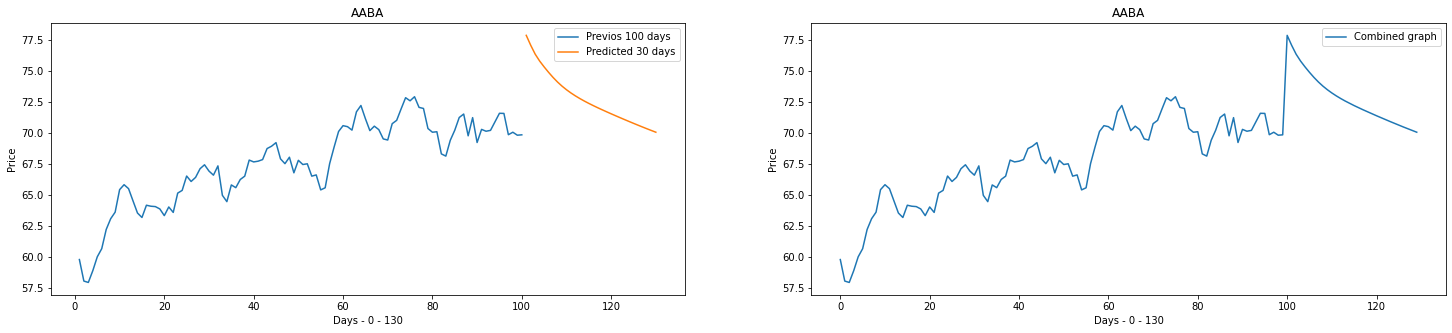

In [ ]:
pred_plot(df_100['JNJ'],jnj_out,"JNJ")
pred_plot(df_100['JPM'],jpm_out,"JPM")
pred_plot(df_100['MCD'],mcd_out,"MCD")
pred_plot(df_100['MRK'],mrk_out,"MRK")
pred_plot(df_100['MSFT'],msft_out,"MSFT")
pred_plot(df_100['NKE'],nke_out,"NKE")
pred_plot(df_100['PFE'],pfe_out,"PFE")
pred_plot(df_100['PG'],pg_out,"PG")
pred_plot(df_100['TRV'],trv_out,"TRV")
pred_plot(df_100['UTX'],utx_out,"UTX")
pred_plot(df_100['UNH'],unh_out,"UNH")
pred_plot(df_100['VZ'],vz_out,"VZ")
pred_plot(df_100['WMT'],wmt_out,"WMT")
pred_plot(df_100['GOOGL'],googl_out,"GOOGLE")
pred_plot(df_100['AMZN'],amzn_out,"AMAZON")
pred_plot(df_100['AABA'],aaba_out,"AABA")